# Trending Youtube Video

### **MOTIVATION**

YouTube maintains a list of the top trending videos on the platform. According to Variety magazine, “To determine the year’s top-trending videos, YouTube uses a combination of factors including measuring users interactions (number of views, shares, comments and likes). Note that they’re not the most-viewed videos overall for the calendar year”. 

**The purpose of this analysis is to understand the correlation between views and likes in order to extract useful insights for content strategy.** First, I will figure out if there is a correlation between the number of views and the number of likes. Then, I will analyze what factors affect popularity of YouTube video. This project is based on the dataset that show daily record of the top trending YouTube videos.

#### **TABLE OF CONTENT**

 **1. Exploratory Data Analysis (EDA):**
    - US Dataset 
    - World Dataset
    - Correlation between Views and Likes
    - Trending Channel
    - Tredning Topics


 **2. Clustering:** 
     - DBSCAN 
     - KMeans

### **DATASET BREAK DOWN**

This dataset was collected using the YouTube API. This includes several months (and counting) of data on daily trending YouTube videos. Data is included for the US, GB, DE, CA, FR, RU, MX, KR, JP and IN regions (USA, Great Britain, Germany, Canada, and France, Russia, Mexico, South Korea, Japan and India respectively), with up to 375,942 of trending videos record.

Each region’s data is in a separate file. Data includes the video title, channel title, publish time, tags, views, likes and dislikes, description, and comment count.


## 1. Exploratory Data Analysis (EDA)

####  Correlation Between Views and Likes: US and Worldwide

In [175]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot

### Import US dataset

In [176]:
#Import US Dataset 
us_yt = pd.read_csv("C:/Users/choin/OneDrive/Desktop/Dataset/Trending Youtube/USvideos.csv")
display(us_yt.head())
print(us_yt.columns)
print(us_yt.shape)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')
(40949, 16)


In order to calculate correlation between views and likes, the Pearson correlation coefficient is the most efficient. The Pearson (product-moment) correlation coefficient is a measure of the linear relationship between two features. It’s the ratio of the covariance of x and y to the product of their standard deviations. It’s often denoted with the letter r and called Pearson’s r. Mathematical expression for this equation is:

$$\begin{align}
r = Σᵢ((xᵢ − mean(x))(yᵢ − mean(y))) (√Σᵢ(xᵢ − mean(x))² √Σᵢ(yᵢ − mean(y))²)⁻¹
\end{align}$$


**Correlation Between x and y**

- Equal to 1 = perfect positive linear relationship 

- greater than 0 = positive correlation

- equal to 0 = independent

- less than 0 = negative correlation

- equal to -1 = perfect negative linear relationship

In [177]:
# Create dataframe from US data set to calcaulate correlation between views, likes, dislike, and number of comments. 
us_df = us_yt[['views', 'likes', 'dislikes', 'comment_count']]
us_corr = us_df.corr()
display(us_corr)
us_corr.corr().style.background_gradient()

,views,likes,dislikes,comment_count
views,1.000000,0.849177,0.472213,0.617621
likes,0.849177,1.000000,0.447186,0.803057
dislikes,0.472213,0.447186,1.000000,0.700184
comment_count,0.617621,0.803057,0.700184,1.000000


,views,likes,dislikes,comment_count
views,1,0.77586,-0.927908,-0.388485
likes,0.77586,1,-0.955015,0.219919
dislikes,-0.927908,-0.955015,1,0.0574002
comment_count,-0.388485,0.219919,0.0574002,1


### Correlations Visualization

#### Heatmap

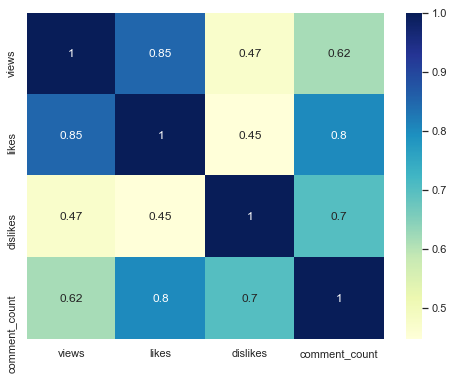

In [178]:
#Heatmap  (hm_data --> dataframe name)
matplotlib.pyplot.figure(figsize=(8,6))
sns.heatmap(us_corr, annot=True, cmap="YlGnBu");

#### Scatterplot & Histogram

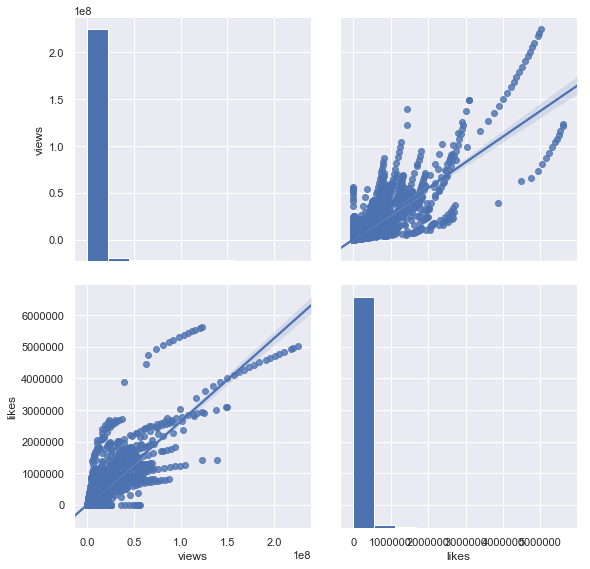

In [179]:
#matplotlib.pyplot.figure(figsize=(8,8))
sns.pairplot(us_df[['views', 'likes']], kind='reg',height=4);

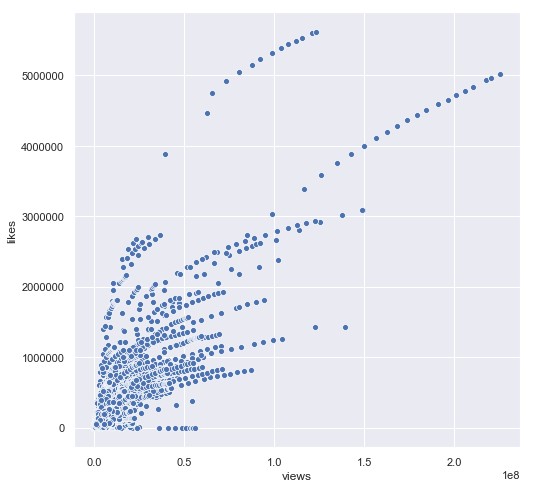

In [180]:
#to get a closer look at the scatterplot for likes/views

matplotlib.pyplot.figure(figsize=(8,8))
sns.scatterplot(x=us_df['views'], y=us_df['likes']);

### Import World Data

In [181]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
col_list = ['video_id', 'views', 'likes', 'dislikes', 'comment_count']
us = pd.read_csv('C:/Users/choin/OneDrive/Desktop/Dataset/Trending Youtube/USvideos.csv', usecols=col_list) #USA, remaking the dataframe in the same format as the others
ca = pd.read_csv('C:/Users/choin/OneDrive/Desktop/Dataset/Trending Youtube/CAvideos.csv', usecols=col_list) #Canada
de = pd.read_csv('C:/Users/choin/OneDrive/Desktop/Dataset/Trending Youtube/DEvideos.csv', usecols=col_list) #Germany
fr = pd.read_csv('C:/Users/choin/OneDrive/Desktop/Dataset/Trending Youtube/FRvideos.csv', usecols=col_list) #France
gb = pd.read_csv('C:/Users/choin/OneDrive/Desktop/Dataset/Trending Youtube/GBvideos.csv', usecols=col_list) #United Kingdom 
ind = pd.read_csv('C:/Users/choin/OneDrive/Desktop/Dataset/Trending Youtube/INvideos.csv', usecols=col_list) #India
jp = pd.read_csv('C:/Users/choin/OneDrive/Desktop/Dataset/Trending Youtube/JPvideos.csv', usecols=col_list) #Japan
kr = pd.read_csv('C:/Users/choin/OneDrive/Desktop/Dataset/Trending Youtube/KRvideos.csv', usecols=col_list) #South Korea
mx = pd.read_csv('C:/Users/choin/OneDrive/Desktop/Dataset/Trending Youtube/MXvideos.csv', usecols=col_list) #Mexico
ru = pd.read_csv('C:/Users/choin/OneDrive/Desktop/Dataset/Trending Youtube/RUvideos.csv', usecols=col_list) #Russia

df_list = [us, ca, de, fr, gb, ind, jp, kr, mx, ru]
df_name_list = ['United States', 'Canada', 'Germany', 'France', 'United Kingdom', 'India',
                'Japan', 'South Korea', 'Mexico', 'Russia']

Master_df = pd.DataFrame(columns=['views', 'likes', 'country'])


#### World Data Scatter Plot

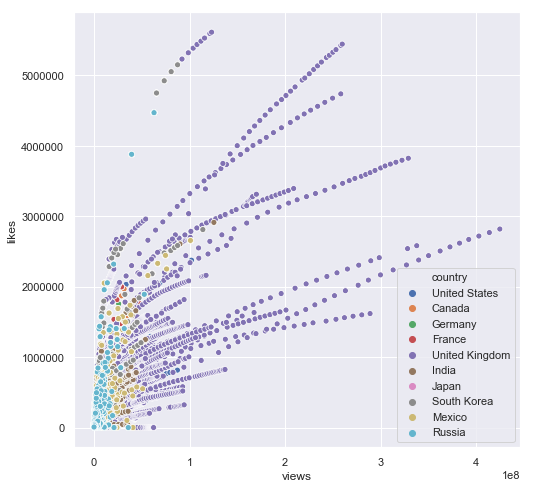

In [182]:
for i in range (len(df_list)):
    add = np.full((len(df_list[i])),df_name_list[i])
    df_list[i]['country'] = add
    Master_df = pd.merge(Master_df,df_list[i], how='outer')
    
matplotlib.pyplot.figure(figsize=(8,8))
sns.scatterplot(x=Master_df["views"], y=Master_df["likes"], hue=Master_df["country"])

According to the scatter plot, there is a strong positive correlation between likes and views. The trend is more visible in outlier cases. 

### Top 15 Trending Channel in US

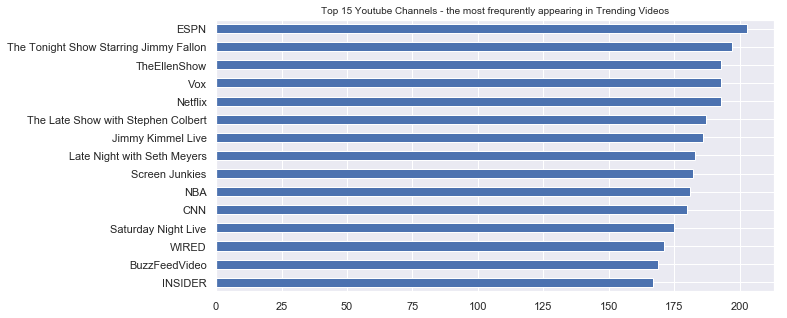

In [183]:
us_yt['channel_title'].value_counts().head(15).sort_values().plot(kind='barh', figsize=(10,5))
plt.title("Top 15 Youtube Channels - the most frequrently appearing in Trending Videos", size=10)
plt.show()

### Top 15 Trending Category in US

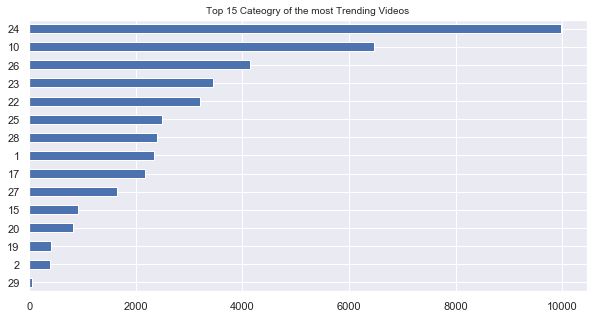

In [184]:
us_yt['category_id'].value_counts().head(15).sort_values().plot(kind='barh', figsize=(10,5))
plt.title("Top 15 Cateogry of the most Trending Videos", size=10)
plt.show()

## 2. Clustering 

In [185]:
Master_df.tail()

,video_id,views,likes,dislikes,comment_count,country
375937,OMmR9THjVKM,129488,5893,164,990,Russia
375938,tX7p7NtNVDE,99163,4659,337,692,Russia
375939,KAyj5Xm1C64,449611,24808,93,974,Russia
375940,4PiSLIrsSiY,14225,793,39,209,Russia
375941,Ehy5foVfKOE,52340,7708,133,1819,Russia


Automatically created module for IPython interactive environment
Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.883
Silhouette Coefficient: 0.626


C:\Users\choin\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


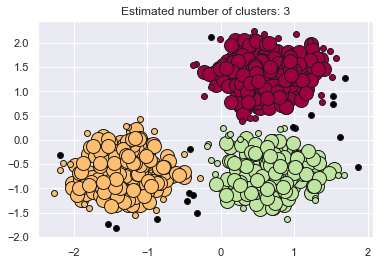

In [186]:
print(__doc__)

import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Generate sample data

X = Master_df
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [187]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [188]:
import sklearn
print(sklearn.__version__)

0.20.3


The *k*-means algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset.
It accomplishes this using a simple conception of what the optimal clustering looks like:

- The "cluster center" is the arithmetic mean of all the points belonging to the cluster.
- Each point is closer to its own cluster center than to other cluster centers.

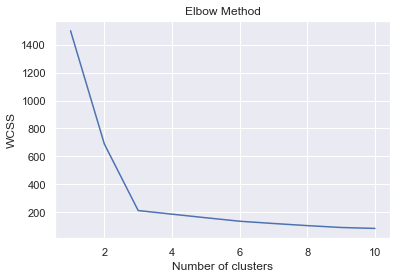

In [189]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

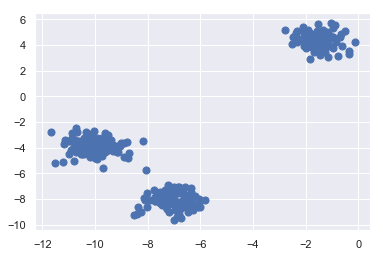

In [190]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=1)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [191]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
print(y_kmeans)

[2 1 2 0 0 0 2 0 0 1 1 1 2 2 1 0 2 2 0 2 2 2 0 0 0 2 2 0 2 2 0 1 1 2 1 2 1
 0 1 0 0 1 0 0 2 2 0 1 2 2 1 2 2 2 0 2 0 1 0 2 2 1 1 0 0 1 1 0 1 2 0 0 0 2
 0 2 1 0 0 2 2 2 0 2 0 1 2 2 0 2 1 0 2 1 2 1 2 2 1 1 2 1 0 1 1 0 0 2 1 2 1
 2 1 0 2 0 1 2 2 0 2 0 1 2 1 0 0 2 1 2 1 2 0 1 1 2 1 2 2 2 1 0 0 1 2 1 0 2
 1 0 1 2 1 2 0 1 1 2 1 2 2 0 0 1 0 2 1 0 0 2 0 2 2 0 0 0 1 2 1 1 0 2 0 2 0
 0 0 1 2 1 2 0 0 0 0 2 0 2 0 0 1 1 2 1 1 0 1 1 1 2 0 2 1 0 1 0 1 2 0 0 2 1
 2 0 1 0 2 0 0 1 0 2 1 1 0 1 2 1 1 0 1 0 1 2 0 1 0 0 0 2 0 1 2 1 0 1 2 1 2
 0 2 1 0 2 1 0 0 2 2 1 1 0 1 1 0 1 1 1 0 1 0 1 2 1 1 2 1 2 1 1 2 2 0 2 2 0
 2 1 1 1]


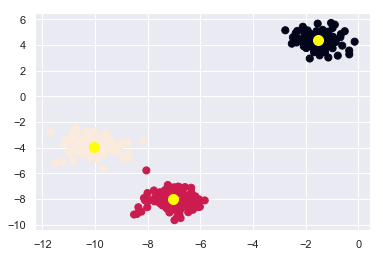

In [192]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=100, alpha=1)

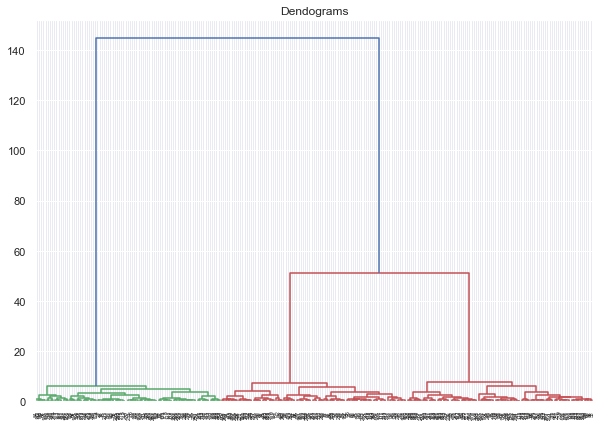

In [193]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Dendograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))  